# Imports

In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('../')
import pdf_parsing as pdfp

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon':True})

from joblib import dump, load

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ravenclaw\example_dataframes.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'date': pd.Series(pd.date_range(start = pd.datetime.today(), periods = 11)).dt.date


# Goal

One of the problem of making content recomandation about articles is that we don't have a process to get abstract.

I found two way :
- Scrap abstract with multiple process
    - 1 you take one missing abstract
    - 2 check how you can extract it from source
    - 3 apply the extraction process on all article
    - 4 remove bad extracted abstract
    - repeat 1, 2, 3, 4 while you miss one abstract
- Try to predict if a part of the source is belong to abstract
    - In the [pdf package](https://github.com/idin/pdf), i found a method to convert pdf into csv (pdf.PdfFile.get_data)
    - The function get_data extract data of each line in the pdf (like font_size, paragraphe ...) into a dataframe
    - The feature title represent the theorical title of the paragraph. Sometime it's work and line title is abstract
    - So we can maybe use this dataframe (with getting more feature with the text of the line) to predict if a line is the DataFrame

# Load

In [2]:
df = pdfp.get_pdf_info()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    746 non-null    object
 1   stem    746 non-null    object
dtypes: object(2)
memory usage: 11.8+ KB


path  \
0  ..\biblio\1_navigation\files\1287\Multisnesor ...   
1  ..\biblio\1_navigation\files\1288\Abyarjoo et ...   
2  ..\biblio\1_navigation\files\1289\Unscented Ka...   
3  ..\biblio\1_navigation\files\1299\Roleder et a...   
4  ..\biblio\1_navigation\files\1304\Madgwick - A...   

                                                stem  
0                            Multisnesor Data Fusion  
1  Abyarjoo et al. - 2015 - Implementing a Sensor...  
2  Unscented Kalman Filter for non linear estimation  
3  Roleder et al. - 2015 - The basics of intravas...  
4  Madgwick - An eﬃcient orientation ﬁlter for in...

# Remove Duplicate

In [3]:
df = df.drop_duplicates('stem')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    687 non-null    object
 1   stem    687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


# Csv from Pdf

In [4]:
pdfp.generate_multiple_csv(df['path'].to_numpy())

0 / 687 - -0.145560 - ..\biblio\1_navigation\files\1287\Multisnesor Data Fusion.pdf
1 / 687 - 0.000000 - ..\biblio\1_navigation\files\1288\Abyarjoo et al. - 2015 - Implementing a Sensor Fusion Algorithm for 3D Orie.pdf
2 / 687 - 0.145560 - ..\biblio\1_navigation\files\1289\Unscented Kalman Filter for non linear estimation.pdf
3 / 687 - 0.291121 - ..\biblio\1_navigation\files\1299\Roleder et al. - 2015 - The basics of intravascular optical coherence tomo.pdf
4 / 687 - 0.436681 - ..\biblio\1_navigation\files\1304\Madgwick - An eﬃcient orientation ﬁlter for inertial and iner.pdf
5 / 687 - 0.582242 - ..\biblio\1_navigation\files\1308\Park et al. - 2010 - Real-Time Estimation of 3-D Needle Shape and Defle.pdf
6 / 687 - 0.727802 - ..\biblio\1_navigation\files\1309\Park et al. - 2007 - Force Sensing Robot Fingers using Embedded Fiber B.pdf
7 / 687 - 0.873362 - ..\biblio\1_navigation\files\1310\Henken et al. - 2013 - Error Analysis of FBG-Based Shape Sensors for Medi.pdf
8 / 687 - 1.018923 - .

exception raised when tried to get_text for Inria Patent mdeical instrument.pdf
could not convert Inria Patent mdeical instrument.pdf to html after 3 tries
65 / 687 - 9.315866 - ..\biblio\1_navigation\files\212\80.pdf
66 / 687 - 9.461426 - ..\biblio\1_navigation\files\214\88962e3214d3ece2320082eae483673b9d66.pdf
67 / 687 - 9.606987 - ..\biblio\1_navigation\files\215\SAA2003_107_21.pdf
68 / 687 - 9.752547 - ..\biblio\1_navigation\files\216\7846.pdf
69 / 687 - 9.898108 - ..\biblio\1_navigation\files\217\1-s2.0-S0030401810013696-main.pdf
70 / 687 - 10.043668 - ..\biblio\1_navigation\files\222\Thesis_EM-Catheter.pdf
71 / 687 - 10.189229 - ..\biblio\1_navigation\files\281\ApplOpt-StrainSensor-2007.pdf
72 / 687 - 10.334789 - ..\biblio\1_navigation\files\322\Multi Sensor Data Fusion.pdf
73 / 687 - 10.480349 - ..\biblio\1_navigation\files\326\Brevet - Method and system For mutli-mode coverage for an autonomous robot.pdf
'Title' object is not iterable
74 / 687 - 10.625910 - ..\biblio\1_navigati

exception raised when tried to get_text for Hashemi Sanatgar et al. - 2017 - Investigation of the adhesion properties of direct.pdf
could not convert Hashemi Sanatgar et al. - 2017 - Investigation of the adhesion properties of direct.pdf to html after 3 tries
168 / 687 - 24.308588 - ..\biblio\3_systemes\files\1990\Wittbrodt et Pearce - 2015 - The effects of PLA color on material properties of.pdf
169 / 687 - 24.454148 - ..\biblio\3_systemes\files\1991\Hernandez - 2015 - Factors Affecting Dimensional Precision of Consume.pdf
170 / 687 - 24.599709 - ..\biblio\3_systemes\files\1992\Lužanin et al. - 2013 - EXPERIMENTAL INVESTIGATION OF EXTRUSION SPEED AND .pdf
171 / 687 - 24.745269 - ..\biblio\3_systemes\files\1993\Stephen Oluwashola Akande et Newcastle University, UK - 2015 - Dimensional Accuracy and Surface Finish Optimizati.pdf
172 / 687 - 24.890830 - ..\biblio\3_systemes\files\1994\Rosas - Characterization of Parametric Internal Structures.pdf
173 / 687 - 25.036390 - ..\biblio\3_system

exception raised when tried to get_text for Comparative Analysis between Document-based and Model-based Compliance management appoaches.pdf
(18.4, 18.4, 50)
355 / 687 - 51.528384 - ..\biblio\4_r_and_d\files\1730\OPM3 Portugal Project Analysis of Preliminary Results.pdf
356 / 687 - 51.673945 - ..\biblio\4_r_and_d\files\1733\A Review of Maturity Models and their Application to PSS Towards a PSS Maturity Model.pdf
357 / 687 - 51.819505 - ..\biblio\4_r_and_d\files\1736\Process Improvement Framework evaluation.pdf
358 / 687 - 51.965066 - ..\biblio\4_r_and_d\files\1738\WHAT MAKES A USEFUL MATURITY MODEL_A FRAMEWORK OF GENERAL DESIGN.pdf
359 / 687 - 52.110626 - ..\biblio\4_r_and_d\files\1740\Lianying et al. - 2012 - The Project Management Maturity Model and Applicat.pdf
360 / 687 - 52.256186 - ..\biblio\4_r_and_d\files\1741\Method for a Systematic Evaluation of Advanced Complexity Management Maturity.pdf
361 / 687 - 52.401747 - ..\biblio\4_r_and_d\files\1742\Sustainable Organizational Learnin

'Title' object is not iterable
446 / 687 - 64.774381 - ..\biblio\4_r_and_d\files\658\DSD 5000.02_Memo+Doc.pdf
447 / 687 - 64.919942 - ..\biblio\4_r_and_d\files\661\9781317639640_sample_645428.pdf
448 / 687 - 65.065502 - ..\biblio\4_r_and_d\files\662\18978146f2cb53507e9c975118cbede4.pdf
449 / 687 - 65.211063 - ..\biblio\4_r_and_d\files\663\Dahan-Hauser_New_Product_in_Handbook050702.pdf
450 / 687 - 65.356623 - ..\biblio\4_r_and_d\files\760\Limits-to-Growth-digital-scan-version.pdf
451 / 687 - 65.502183 - ..\biblio\eco\files\10028\Asaah_Trees_2010.pdf
452 / 687 - 65.647744 - ..\biblio\eco\files\10102\Bonhomme_TP_2010.pdf
453 / 687 - 65.793304 - ..\biblio\eco\files\10160\Peichl_GCB_2010.pdf
454 / 687 - 65.938865 - ..\biblio\eco\files\10191\Marcellin_1982_crise climacterique.pdf
455 / 687 - 66.084425 - ..\biblio\eco\files\10285\Carbone_JGR_2008.pdf
456 / 687 - 66.229985 - ..\biblio\eco\files\10307\Richardson_DD_2011.pdf
457 / 687 - 66.375546 - ..\biblio\eco\files\10320\Kull_DD_2011.pdf
458 

exception raised when tried to get_text for Mori_JE_2018.pdf
(782.362, 782.362, 50)
545 / 687 - 79.184862 - ..\biblio\eco\files\6187\Minchin et Thorpe - 1996 - What determines carbon partitioning between compet.pdf
546 / 687 - 79.330422 - ..\biblio\eco\files\6245\Chazdon et al. - 2016 - When is a forest a forest Forest concepts and def.pdf
547 / 687 - 79.475983 - ..\biblio\eco\files\6255\Lin_NP_2017.pdf
548 / 687 - 79.621543 - ..\biblio\eco\files\6276\Jung_Nature_2017.pdf
549 / 687 - 79.767103 - ..\biblio\eco\files\6308\Rosell_Oec_2015.pdf
550 / 687 - 79.912664 - ..\biblio\eco\files\6324\Momayyezi_PCE_2017.pdf
551 / 687 - 80.058224 - ..\biblio\eco\files\6355\Roux_SAJS_2000.pdf
exception raised when tried to get_text for Roux_SAJS_2000.pdf
could not convert Roux_SAJS_2000.pdf to html after 3 tries
552 / 687 - 80.203785 - ..\biblio\eco\files\6419\Gholz_GCB_2000.pdf
553 / 687 - 80.349345 - ..\biblio\eco\files\6428\Palta_SBB_1997.pdf
554 / 687 - 80.494905 - ..\biblio\eco\files\6542\Trichet

exception raised when tried to get_text for Medlyn 2004 A maestro retrospective.pdf
could not convert Medlyn 2004 A maestro retrospective.pdf to html after 3 tries
659 / 687 - 95.778748 - ..\biblio\eco\files\9315\Brodribb_FPB_2010.pdf
660 / 687 - 95.924309 - ..\biblio\eco\files\9361\Wright_Ecol_2011.pdf
661 / 687 - 96.069869 - ..\biblio\eco\files\9404\Chemidlin_ASE_2011.pdf
662 / 687 - 96.215429 - ..\biblio\eco\files\9418\Brooksbank_TP_2011.pdf
663 / 687 - 96.360990 - ..\biblio\eco\files\9477\Maseyl_Oec_2011.pdf
664 / 687 - 96.506550 - ..\biblio\eco\files\9512\Rascher_TP_2010.pdf
665 / 687 - 96.652111 - ..\biblio\eco\files\9545\Lei_Forest-Ecology-and-Management_2012.pdf
666 / 687 - 96.797671 - ..\biblio\eco\files\9569\Hansen_Trees_1990.pdf
exception raised when tried to get_paragraphs from text of Hansen_Trees_1990.pdf
'NoneType' object has no attribute '_tag'
667 / 687 - 96.943231 - ..\biblio\eco\files\9591\Zhu_PS_2011 13C isotope fractionation during rhizosphere respiration of C3 and

In [5]:
data = pdfp.get_multiple_csv(df['path'].to_numpy())
data.head()

..\biblio\1_navigation\files\348\Principes fondamentaux des capteurs à fibre optique FBG - National Instruments.pdf - No columns to parse from file
..\biblio\4_r_and_d\files\505\Whats_Your_Projects_Real_Price_Tag_.pdf - No columns to parse from file


path  \
0  ..\biblio\1_navigation\files\1299\Roleder et a...   
1  ..\biblio\1_navigation\files\1308\Park et al. ...   
2  ..\biblio\1_navigation\files\1311\Xinhua et al...   
3  ..\biblio\1_navigation\files\1312\THE OPTICAL ...   
4  ..\biblio\1_navigation\files\1315\bronchoscopi...   

                                                data  
0                                                ...  
1                                                ...  
2                                                ...  
3                                                ...  
4                 pdf  section  paragraph  part  ...

# Split Data 

In [6]:
test = data.sample(frac=.3, random_state=0)
train = data[~data.index.isin(test.index)]
print('data.len : {}, train.len : {}, test.len : {}, train.len + test.len : {}'.format(len(data), len(train), len(test), len(train) + len(test)))

data.len : 230, train.len : 161, test.len : 69, train.len + test.len : 230


# Unpack Data

In [7]:
train_data = pd.concat(train['data'].to_numpy(), ignore_index=True)
test_data = pd.concat(test['data'].to_numpy(), ignore_index=True)

print('train.is_abstract.sum : {}, test.is_abstract.sum : {}'.format(
    train_data['is_abstract'].sum(), test_data['is_abstract'].sum()))

train.is_abstract.sum : 1435, test.is_abstract.sum : 388


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49805 entries, 0 to 49804
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pdf                  49805 non-null  object 
 1   section              49805 non-null  int64  
 2   paragraph            49805 non-null  int64  
 3   part                 49805 non-null  int64  
 4   title                49731 non-null  object 
 5   title_font_size      49752 non-null  float64
 6   paragraph_font_size  49805 non-null  float64
 7   text                 49804 non-null  object 
 8   is_abstract          49805 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


# Features

In [9]:
feature_names = ['section', 'paragraph', 'part', 'title_font_size', 'paragraph_font_size', 'dot_count', 'maj_count', 'char_count', 'word_count']
pl = pdfp.get_pipeline(feature_names)

## Train

In [10]:
X_train = pl.fit_transform(train_data)
y_train = train_data['is_abstract']
print('{} - {}'.format(X_train.shape, y_train.shape))

[Pipeline] ... (step 1 of 7) Processing text_conversion, total=   0.0s
[Pipeline] ........ (step 2 of 7) Processing char_count, total=   0.0s
[Pipeline] ........ (step 3 of 7) Processing word_count, total=   0.5s
[Pipeline] ......... (step 4 of 7) Processing dot_count, total=   0.0s
[Pipeline] ......... (step 5 of 7) Processing maj_count, total=   0.1s
[Pipeline] ... (step 6 of 7) Processing select_features, total=   0.0s
[Pipeline] ...... (step 7 of 7) Processing fill_font_na, total=   0.0s
(49805, 9) - (49805,)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Test

In [11]:
X_test = pl.fit_transform(test_data)
y_test = test_data['is_abstract']
print('{} - {}'.format(X_test.shape, y_test.shape))

[Pipeline] ... (step 1 of 7) Processing text_conversion, total=   0.0s
[Pipeline] ........ (step 2 of 7) Processing char_count, total=   0.0s
[Pipeline] ........ (step 3 of 7) Processing word_count, total=   0.2s
[Pipeline] ......... (step 4 of 7) Processing dot_count, total=   0.0s
[Pipeline] ......... (step 5 of 7) Processing maj_count, total=   0.1s
[Pipeline] ... (step 6 of 7) Processing select_features, total=   0.0s
[Pipeline] ...... (step 7 of 7) Processing fill_font_na, total=   0.0s
(18523, 9) - (18523,)


## Scale

In [12]:
scaler = StandardScaler().fit(pd.concat([X_train, X_test]))
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## RandomForest

In [13]:
# param_grid = {
#     'bootstrap':[True, False],
#     'criterion':['gini', 'entropy'],
#     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10]
# }
# search = GridSearchCV(RandomForestClassifier(**params), param_grid=param_grid, verbose=1, n_jobs=4).fit(X_train, y_train)
# evaluate(search.best_estimator_)

In [14]:
params = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 
          'max_depth': 40, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 
          'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2000,
          'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

In [15]:
model = RandomForestClassifier(**params).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
print(model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9897424823192787
[[18070    65]
 [  125   263]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18135
           1       0.80      0.68      0.73       388

    accuracy                           0.99     18523
   macro avg       0.90      0.84      0.86     18523
weighted avg       0.99      0.99      0.99     18523



# Look for best tresholds

In [17]:
y_proba = model.predict_proba(X_test)
y_proba

array([[0.8915, 0.1085],
       [0.998 , 0.002 ],
       [0.95  , 0.05  ],
       ...,
       [1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ]])

In [18]:
tresholds = np.arange(0, 1, step=0.05)
res = np.empty((len(tresholds), 6))
for i in range(0, len(tresholds)):
    report = classification_report(y_test, np.vectorize(lambda x: 1 if x > tresholds[i] else 0)(y_proba[:, 1]), output_dict=True)
    res[i, 0] = report['1']['precision']
    res[i, 1] = report['1']['recall']
    res[i, 2] = report['1']['f1-score']
    res[i, 3] = report['0']['precision']
    res[i, 4] = report['0']['recall']
    res[i, 5] = report['0']['f1-score']      

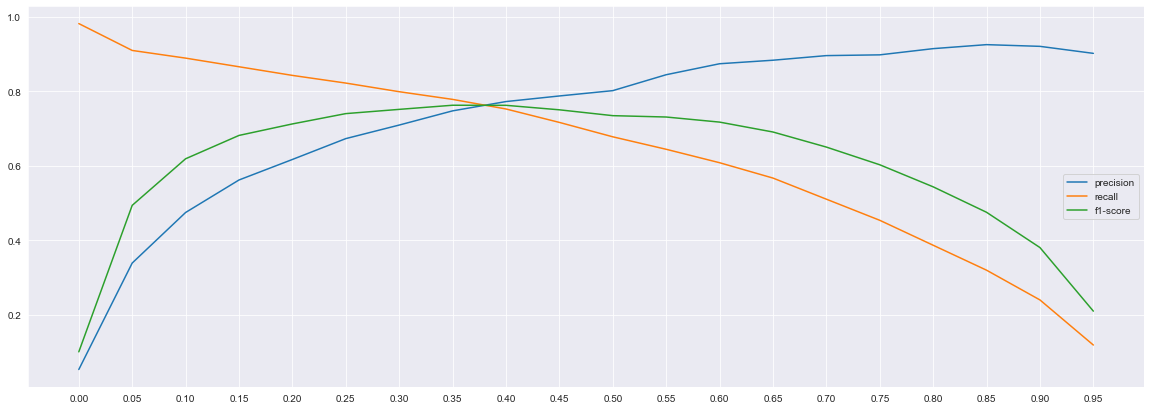

In [19]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(tresholds, res[:, 0], label='precision')
ax.plot(tresholds, res[:, 1], label='recall')
ax.plot(tresholds, res[:, 2], label='f1-score')
plt.xticks(tresholds)
leg = ax.legend()

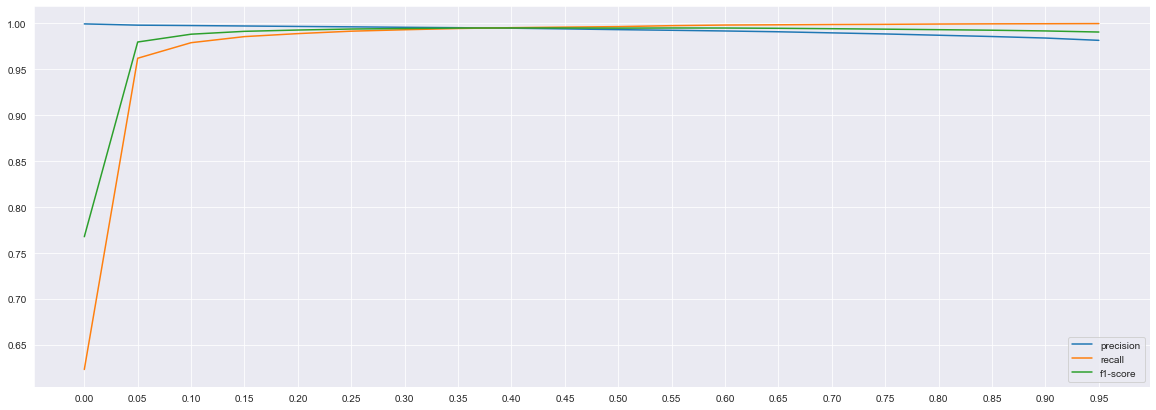

In [20]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(tresholds, res[:, 3], label='precision')
ax.plot(tresholds, res[:, 4], label='recall')
ax.plot(tresholds, res[:, 5], label='f1-score')
plt.xticks(tresholds)
leg = ax.legend()

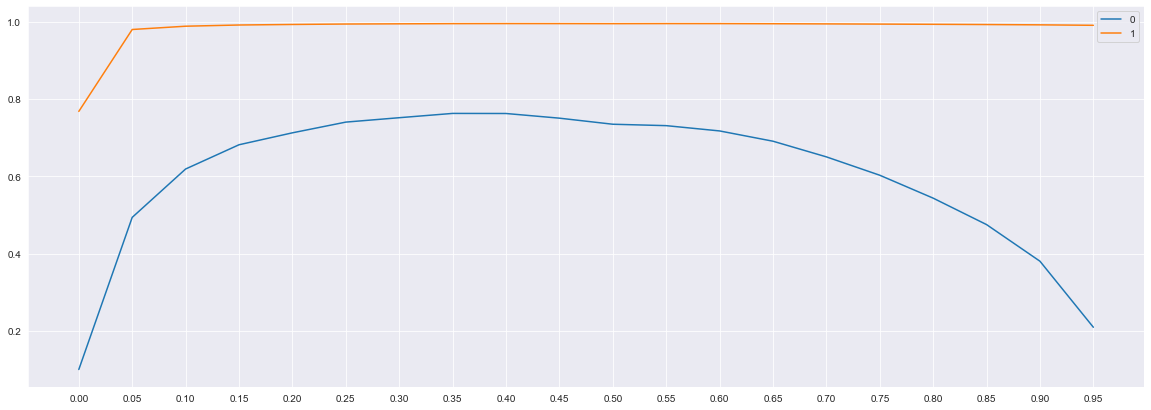

In [21]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(tresholds, res[:, 2], label='0')
ax.plot(tresholds, res[:, 5], label='1')
plt.xticks(tresholds)
leg = ax.legend()

## Teshold = .38

In [22]:
print(classification_report(y_test, np.vectorize(lambda x: 1 if x > .38 else 0)(y_proba[:, 1])))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18135
           1       0.76      0.76      0.76       388

    accuracy                           0.99     18523
   macro avg       0.88      0.88      0.88     18523
weighted avg       0.99      0.99      0.99     18523



## Save model

In [ ]:
dump(model, '../models/rf_abstract.joblib')
dump(scaler, '../models/scaler_abstract.joblib')

In [ ]:
model = load('../models/rf_abstract.joblib')

In [39]:
y = model.predict_proba(X_test)
y = np.vectorize(lambda x: 1 if x > .38 else 0)(y[:, 1])
print(confusion_matrix(y_test, y))
print(classification_report(y_test, y))

[[18044    91]
 [   92   296]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18135
           1       0.76      0.76      0.76       388

    accuracy                           0.99     18523
   macro avg       0.88      0.88      0.88     18523
weighted avg       0.99      0.99      0.99     18523



In [44]:
y = model.predict_proba(X_test)
y = np.vectorize(lambda x: True if x > .38 else False)(y[:, 1])
len(X_test[y])

387